In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
from math import sqrt
import warnings

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["savefig.format"] = 'tiff'
warnings.filterwarnings("ignore")

In [2]:
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=2)


In [3]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 160:
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)



# Neural Network
def Neural_network():
    init = keras.initializers.random_normal()
    model=Sequential()
    model.add(layers.Dense(64,activation='relu',kernel_initializer=init, input_dim=scaled_DF.shape[1]))
    model.add(layers.Dropout(0.1))
    

    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(1,kernel_initializer=init,activation = 'linear'))
 
    
    optimize=tf.keras.optimizers.Adam()
    
    model.compile(optimizer=optimize,
                    loss='mse',
                    )
    return model

# To calclulate  Correlation and remove highly  correlated columns
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [4]:
# Funtion to train the model
def training_model(X_train,Y_train,model):
    history=model.fit(X_train,Y_train,epochs=200,batch_size=64,verbose=0,callbacks=[callback])
    return history

In [5]:
# To print losses
def plots():
    f, ax = plt.subplots(1,1)
    actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
    predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

    #actual=testY
    #predicted= model.predict(testX)

    actual=np.array(scaler.inverse_transform(np.array(trainY).reshape(-1,1)))
    predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))

    sns.regplot(actual,predicted, color='midnightblue', scatter_kws={'alpha':0.5}, label='Train')
    plt.scatter(actual_test,predicted_test, color='crimson', alpha=0.5, label='Test') #linewidths=0.5, edgecolors='orange')
    
    
    print("Mean absolute error (MAE):      %f" % mean_absolute_error(actual_test,predicted_test))
    print("Mean squared error (MSE):       %f" % mean_squared_error(actual_test,predicted_test))
    print("Root mean squared error (RMSE): %f" % sqrt(mean_squared_error(actual_test,predicted_test)))
    print("R square (R^2):                 %f" % r2_score(actual_test,predicted_test))
    
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    #plt.suptitle("Actual Vs Predicted")
    anchored_text = AnchoredText("R\u00b2 Score_train  "+str(round(r2_score(actual,predicted),3))+'\n'"R\u00b2 Score_test  "+str(round(r2_score(actual_test,predicted_test),3)), loc=2,prop=dict(size=15))
    ax.add_artist(anchored_text)
    plt.savefig(str(model)[1:6], bbox_inches='tight')
    plt.legend(loc = 9, prop={'size': 15}) #labels=["Test","Train"], 
    plt.tight_layout()
    plt.show()

In [6]:
def defining_model(x):
    if x == 'mlr':
      model = LinearRegression()
    elif x=='adboost':
      model = AdaBoostRegressor()
    elif x=='xtratree':
      model = ExtraTreesRegressor()
    elif x=='bagging':
      model = BaggingRegressor()
    elif x=='pls':
      model = PLSRegression()
    elif x=='rndmfrst':
      model = RandomForestRegressor()
    elif x=='knn':
      model = KNeighborsRegressor()
    elif x=='svr':
      model = SVR()
    else:
      print("wrong selection")
    return model



In [7]:
# Getting data from CSV file
Train = pd.read_excel('train.xlsx')
Test = pd.read_excel('test.xlsx')
display(Train)
display(Test)

,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,methylphosphonic acid bis(dimethylamide),Phosphorous compounds,O=P(N(C)C)(C)N(C)C,4,-725.713420,-0.23649,-0.01677,0.126630,-0.126630,0.21972,0.001762,3.902329,-4.552455e+05,-4.552782e+05,42.3
1,4-chloro-3-methylphenol,Alcohols/Phenols,OC1=CC(C)=C(Cl)C=C1,2,-806.409087,-0.23093,-0.02612,0.128525,-0.128525,0.20481,0.001692,1.789384,-5.059390e+05,-5.059658e+05,51.0
2,propylene oxide,"Ethers,thioethers and acetals",CC1CO1,1,-193.126496,-0.27519,-0.00654,0.140865,-0.140865,0.26865,0.002665,2.177355,-1.211300e+05,-1.211499e+05,39.8
3,diethyl ether,"Ethers,thioethers and acetals",CCOCC,1,-233.687081,-0.25932,-0.00690,0.133110,-0.133110,0.25242,0.002236,1.207200,-1.465480e+05,-1.465716e+05,34.5
4,1-hexene,Alkanes and alkenes,CCCCC=C,0,-235.875033,-0.25871,-0.00656,0.132635,-0.132635,0.25215,0.002218,0.479572,-1.479024e+05,-1.479281e+05,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,"1,2,4-trichlorobenzene",Arenes,ClC1=C(Cl)C=C(Cl)C=C1,3,-1611.044001,-0.26138,-0.05142,0.156400,-0.156400,0.20996,0.002568,1.364150,-1.011507e+06,-1.010906e+06,36.2
374,n-nonane,Alkanes and alkenes,CCCCCCCCC,0,-355.063530,-0.30006,-0.00716,0.153610,-0.153610,0.29290,0.003456,0.081600,-2.226221e+05,-2.226549e+05,30.8
375,acrylonitrile,Nitrogen containing compounds,C=CC#N,1,-170.845036,-0.30031,-0.07298,0.186645,-0.186645,0.22733,0.003960,4.073910,-1.071701e+05,-1.071897e+05,46.7
376,2-butanone,Ketones,O=C(C)CC,1,-232.492306,-0.25612,-0.02633,0.141225,-0.141225,0.22979,0.002292,3.022773,-1.458138e+05,-1.458377e+05,41.3


,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,methyl cis-9-octadecanoate,Esters,COC(CCCCCCC/C=C/CCCCCCCC)=O,2,-896.251628,-0.24278,-0.01023,0.126505,-0.126505,0.23255,0.001861,1.731598,-5.620534e+05,-5.621123e+05,34.5
1,"1,2-dibromopropane",Halo-alkanes/alkenes/alkynes,CC(Br)CBr,2,-5261.402979,-0.27858,-0.03493,0.156755,-0.156755,0.24365,0.002993,3.038122,-3.301472e+06,-3.301498e+06,39.1
2,diisobutyl ketone,Ketones,O=C(CC(C)C)CC(C)C,1,-429.077621,-0.24985,-0.02832,0.139085,-0.139085,0.22153,0.002143,2.727847,-2.690781e+05,-2.691119e+05,38.0
3,"2,5-dibromo-1-methylbenzene",Arenes,BrC1=CC=C(Br)C=C1C,2,-5413.847711,-0.24730,-0.03920,0.143250,-0.143250,0.20810,0.002135,0.621862,-3.397114e+06,-3.397141e+06,34.7
4,"1,3-difluorobenzene",Arenes,FC1=CC(F)=CC=C1,2,-430.748589,-0.26532,-0.03548,0.150400,-0.150400,0.22984,0.002600,1.710000,-2.702377e+05,-2.702610e+05,37.3
5,1-formylpiperidine,Nitrogen containing compounds,O=CN1CCCCC1,2,-365.282365,-0.24835,-0.01670,0.132525,-0.132525,0.23165,0.002034,4.542739,-2.291036e+05,-2.291289e+05,41.7
6,ethyl-2-butynoate,Esters,O=C(C#CC)OCC,2,-383.876649,-0.27514,-0.04590,0.160520,-0.160520,0.22924,0.002953,2.324132,-2.407958e+05,-2.408262e+05,40.1
7,"1,1,2-trichlorotriflouroethane",Halo-alkanes/alkenes/alkynes,ClC(Cl)(F)C(F)(F)Cl,6,-1756.319984,-0.33862,-0.05807,0.198345,-0.198345,0.28055,0.005519,0.546728,-1.102071e+06,-1.102098e+06,33.2
8,bromotrichloromethane,Halo-alkanes/alkenes/alkynes,ClC(Cl)(Br)Cl,4,-3990.387946,-0.31050,-0.09481,0.202655,-0.202655,0.21569,0.004429,0.148300,-2.503959e+06,-2.503982e+06,34.9
9,tert-butyl methyl ether,"Ethers,thioethers and acetals",CC(C)(C)OC,1,-273.001864,-0.25599,-0.01039,0.133190,-0.133190,0.24560,0.002178,1.356208,-1.712003e+05,-1.712259e+05,34.5


In [8]:
# Combine Train and test for feature engineering
DF = pd.concat([Train,Test],ignore_index=True)
DF_data = DF.copy()
DF

,Name of the Molecule,Solvent type,Smiles,N-Het,E(Energy),E(HOMO),E(LUMO),ꭓ(Electronegativity),µ(Chemical Potential),ɳ(Hardness),Ѡ(Electophilicity Index),d(Dipole Moment),H(Enthalpy),G(Gibbs Free Energy),Et(30)
0,methylphosphonic acid bis(dimethylamide),Phosphorous compounds,O=P(N(C)C)(C)N(C)C,4,-725.713420,-0.23649,-0.01677,0.126630,-0.126630,0.21972,0.001762,3.902329,-455245.5340,-455278.1740,42.3
1,4-chloro-3-methylphenol,Alcohols/Phenols,OC1=CC(C)=C(Cl)C=C1,2,-806.409087,-0.23093,-0.02612,0.128525,-0.128525,0.20481,0.001692,1.789384,-505939.0340,-505965.7670,51.0
2,propylene oxide,"Ethers,thioethers and acetals",CC1CO1,1,-193.126496,-0.27519,-0.00654,0.140865,-0.140865,0.26865,0.002665,2.177355,-121129.9532,-121149.8795,39.8
3,diethyl ether,"Ethers,thioethers and acetals",CCOCC,1,-233.687081,-0.25932,-0.00690,0.133110,-0.133110,0.25242,0.002236,1.207200,-146548.0340,-146571.6130,34.5
4,1-hexene,Alkanes and alkenes,CCCCC=C,0,-235.875033,-0.25871,-0.00656,0.132635,-0.132635,0.25215,0.002218,0.479572,-147902.4110,-147928.1240,32.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,cyclohexanone,Ketones,O=C1CCCCC1,1,-309.917284,-0.24774,-0.03355,0.140645,-0.140645,0.21419,0.002118,3.521915,-194373.8610,-194397.6206,40.1
417,fluorobenzene,Arenes,FC1=CC=CC=C1,1,-331.509183,-0.25786,-0.02843,0.143145,-0.143145,0.22943,0.002351,1.736200,-207960.3470,-207982.2830,37.0
418,1-heptanol,Alcohols/Phenols,CCCCCCCO,1,-351.644943,-0.27716,-0.01223,0.144695,-0.144695,0.26493,0.002773,1.615651,-220510.4450,-220541.0010,48.5
419,diglyme,"Ethers,thioethers and acetals",COCCOCCOC,3,-462.724840,-0.25304,-0.00740,0.130220,-0.130220,0.24564,0.002083,1.910672,-290225.0156,-290257.5282,38.6


In [9]:
DF_data.columns

Index(['Name of the Molecule', 'Solvent type', 'Smiles', 'N-Het', 'E(Energy)',
       'E(HOMO)', 'E(LUMO)', 'ꭓ(Electronegativity)', 'µ(Chemical Potential)',
       'ɳ(Hardness)', 'Ѡ(Electophilicity Index)', 'd(Dipole Moment)',
       'H(Enthalpy)', 'G(Gibbs Free Energy)', 'Et(30)'],
      dtype='object')

In [10]:
# Removing Unwanted columns
DF_data=DF_data.drop(['Name of the Molecule','Smiles'],axis=1)
#DF_data

In [11]:
# Dropping highly correlated Features
corr_features = correlation(DF_data, 0.80)
print("No. of features to drop : ",len(set(corr_features)))

DF_data.drop(corr_features,axis=1,inplace=True)

No. of features to drop :  6


In [12]:
DF_data

,Solvent type,N-Het,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,Phosphorous compounds,4,-725.713420,-0.23649,-0.01677,3.902329,42.3
1,Alcohols/Phenols,2,-806.409087,-0.23093,-0.02612,1.789384,51.0
2,"Ethers,thioethers and acetals",1,-193.126496,-0.27519,-0.00654,2.177355,39.8
3,"Ethers,thioethers and acetals",1,-233.687081,-0.25932,-0.00690,1.207200,34.5
4,Alkanes and alkenes,0,-235.875033,-0.25871,-0.00656,0.479572,32.4
...,...,...,...,...,...,...,...
416,Ketones,1,-309.917284,-0.24774,-0.03355,3.521915,40.1
417,Arenes,1,-331.509183,-0.25786,-0.02843,1.736200,37.0
418,Alcohols/Phenols,1,-351.644943,-0.27716,-0.01223,1.615651,48.5
419,"Ethers,thioethers and acetals",3,-462.724840,-0.25304,-0.00740,1.910672,38.6


In [13]:
DF_data.columns

Index(['Solvent type', 'N-Het', 'E(Energy)', 'E(HOMO)', 'E(LUMO)',
       'd(Dipole Moment)', 'Et(30)'],
      dtype='object')

In [14]:
DF_data

,Solvent type,N-Het,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,Phosphorous compounds,4,-725.713420,-0.23649,-0.01677,3.902329,42.3
1,Alcohols/Phenols,2,-806.409087,-0.23093,-0.02612,1.789384,51.0
2,"Ethers,thioethers and acetals",1,-193.126496,-0.27519,-0.00654,2.177355,39.8
3,"Ethers,thioethers and acetals",1,-233.687081,-0.25932,-0.00690,1.207200,34.5
4,Alkanes and alkenes,0,-235.875033,-0.25871,-0.00656,0.479572,32.4
...,...,...,...,...,...,...,...
416,Ketones,1,-309.917284,-0.24774,-0.03355,3.521915,40.1
417,Arenes,1,-331.509183,-0.25786,-0.02843,1.736200,37.0
418,Alcohols/Phenols,1,-351.644943,-0.27716,-0.01223,1.615651,48.5
419,"Ethers,thioethers and acetals",3,-462.724840,-0.25304,-0.00740,1.910672,38.6


In [15]:

# Scaling the whole DataFrame



scaler = StandardScaler()
scaled_DF = pd.DataFrame(scaler.fit_transform(DF_data.iloc[:,2:6]))
scaled_DF.columns = DF_data.iloc[:,2:6].columns

scaled_DF['Et(30)'] = scaler.fit_transform(np.array(DF_data['Et(30)']).reshape(-1,1))
scaled_DF

display(scaled_DF)

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),Et(30)
0,-0.046220,0.745033,0.462039,0.628494,0.020065
1,-0.138445,0.912882,0.003480,-0.326205,1.236826
2,0.562463,-0.423268,0.963757,-0.150906,-0.329579
3,0.516107,0.055826,0.946101,-0.589255,-1.070824
4,0.513607,0.074241,0.962776,-0.918021,-1.364525
...,...,...,...,...,...
416,0.428985,0.405411,-0.360915,0.456610,-0.287622
417,0.404308,0.099902,-0.109811,-0.350235,-0.721180
418,0.381296,-0.482740,0.684698,-0.404703,0.887182
419,0.254345,0.245411,0.921579,-0.271403,-0.497408


In [16]:
DF_target = scaled_DF[['Et(30)']]
scaled_DF.drop('Et(30)',axis=1,inplace=True)

display(scaled_DF)
display(DF_target)

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment)
0,-0.046220,0.745033,0.462039,0.628494
1,-0.138445,0.912882,0.003480,-0.326205
2,0.562463,-0.423268,0.963757,-0.150906
3,0.516107,0.055826,0.946101,-0.589255
4,0.513607,0.074241,0.962776,-0.918021
...,...,...,...,...
416,0.428985,0.405411,-0.360915,0.456610
417,0.404308,0.099902,-0.109811,-0.350235
418,0.381296,-0.482740,0.684698,-0.404703
419,0.254345,0.245411,0.921579,-0.271403


,Et(30)
0,0.020065
1,1.236826
2,-0.329579
3,-1.070824
4,-1.364525
...,...
416,-0.287622
417,-0.721180
418,0.887182
419,-0.497408


In [17]:
DF_data.columns.values

array(['Solvent type', 'N-Het', 'E(Energy)', 'E(HOMO)', 'E(LUMO)',
       'd(Dipole Moment)', 'Et(30)'], dtype=object)

In [18]:
scaled_DF[['N-Het']] = DF_data[['N-Het']]

In [19]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het
0,-0.046220,0.745033,0.462039,0.628494,4
1,-0.138445,0.912882,0.003480,-0.326205,2
2,0.562463,-0.423268,0.963757,-0.150906,1
3,0.516107,0.055826,0.946101,-0.589255,1
4,0.513607,0.074241,0.962776,-0.918021,0
...,...,...,...,...,...
416,0.428985,0.405411,-0.360915,0.456610,1
417,0.404308,0.099902,-0.109811,-0.350235,1
418,0.381296,-0.482740,0.684698,-0.404703,1
419,0.254345,0.245411,0.921579,-0.271403,3


In [20]:
scaled_DF[['Solvent type']] = DF_data[['Solvent type']]


In [21]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type
0,-0.046220,0.745033,0.462039,0.628494,4,Phosphorous compounds
1,-0.138445,0.912882,0.003480,-0.326205,2,Alcohols/Phenols
2,0.562463,-0.423268,0.963757,-0.150906,1,"Ethers,thioethers and acetals"
3,0.516107,0.055826,0.946101,-0.589255,1,"Ethers,thioethers and acetals"
4,0.513607,0.074241,0.962776,-0.918021,0,Alkanes and alkenes
...,...,...,...,...,...,...
416,0.428985,0.405411,-0.360915,0.456610,1,Ketones
417,0.404308,0.099902,-0.109811,-0.350235,1,Arenes
418,0.381296,-0.482740,0.684698,-0.404703,1,Alcohols/Phenols
419,0.254345,0.245411,0.921579,-0.271403,3,"Ethers,thioethers and acetals"


In [22]:
scaled_DF = pd.get_dummies(scaled_DF)

In [23]:
scaled_DF

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type_Alcohols/Phenols,Solvent type_Alkanes and alkenes,Solvent type_Arenes,Solvent type_Carboxylic acids/anhydrides,Solvent type_Esters,"Solvent type_Ethers,thioethers and acetals",Solvent type_Halo-alkanes/alkenes/alkynes,Solvent type_Heteroarenes,Solvent type_Ketones,Solvent type_Nitrogen containing compounds,Solvent type_Organic salts,Solvent type_Phosphorous compounds,Solvent type_Sulphur compounds
0,-0.046220,0.745033,0.462039,0.628494,4,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.138445,0.912882,0.003480,-0.326205,2,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.562463,-0.423268,0.963757,-0.150906,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0.516107,0.055826,0.946101,-0.589255,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.513607,0.074241,0.962776,-0.918021,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,0.428985,0.405411,-0.360915,0.456610,1,0,0,0,0,0,0,0,0,1,0,0,0,0
417,0.404308,0.099902,-0.109811,-0.350235,1,0,0,1,0,0,0,0,0,0,0,0,0,0
418,0.381296,-0.482740,0.684698,-0.404703,1,1,0,0,0,0,0,0,0,0,0,0,0,0
419,0.254345,0.245411,0.921579,-0.271403,3,0,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
scaled_DF.describe()

,E(Energy),E(HOMO),E(LUMO),d(Dipole Moment),N-Het,Solvent type_Alcohols/Phenols,Solvent type_Alkanes and alkenes,Solvent type_Arenes,Solvent type_Carboxylic acids/anhydrides,Solvent type_Esters,"Solvent type_Ethers,thioethers and acetals",Solvent type_Halo-alkanes/alkenes/alkynes,Solvent type_Heteroarenes,Solvent type_Ketones,Solvent type_Nitrogen containing compounds,Solvent type_Organic salts,Solvent type_Phosphorous compounds,Solvent type_Sulphur compounds
count,4.210000e+02,4.210000e+02,4.210000e+02,4.210000e+02,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.939801e-17,3.871276e-16,2.236269e-16,-7.568504e-17,1.985748,0.247031,0.038005,0.068884,0.009501,0.085511,0.111639,0.102138,0.038005,0.042755,0.173397,0.042755,0.016627,0.023753
std,1.001190e+00,1.001190e+00,1.001190e+00,1.001190e+00,1.407391,0.431798,0.191435,0.253557,0.097125,0.279973,0.315296,0.303190,0.191435,0.202546,0.379040,0.202546,0.128022,0.152460
min,-8.078548e+00,-2.779192e+00,-4.456068e+00,-1.134708e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.707235e-02,-6.176831e-01,-3.334504e-01,-5.183396e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.402768e-01,7.424118e-02,4.174094e-01,-2.844933e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.333975e-01,6.695618e-01,6.773412e-01,2.782646e-01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.122600e-01,3.431523e+00,1.626338e+00,5.828362e+00,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
trainX = scaled_DF[:len(Train)] 
testX = scaled_DF[len(Train):]

trainY = DF_target[:len(Train)]
testY = DF_target[len(Train):]

Average validation R2 score after crossvalidation :  0.6955530035230095
Average validation rmse score after crossvalidation :  3.9515105948036293


Training Accuracy :  0.7227791250225513
Mean absolute error (MAE):      2.573842
Mean squared error (MSE):       13.518981
Root mean squared error (RMSE): 3.676817
R square (R^2):                 0.673417


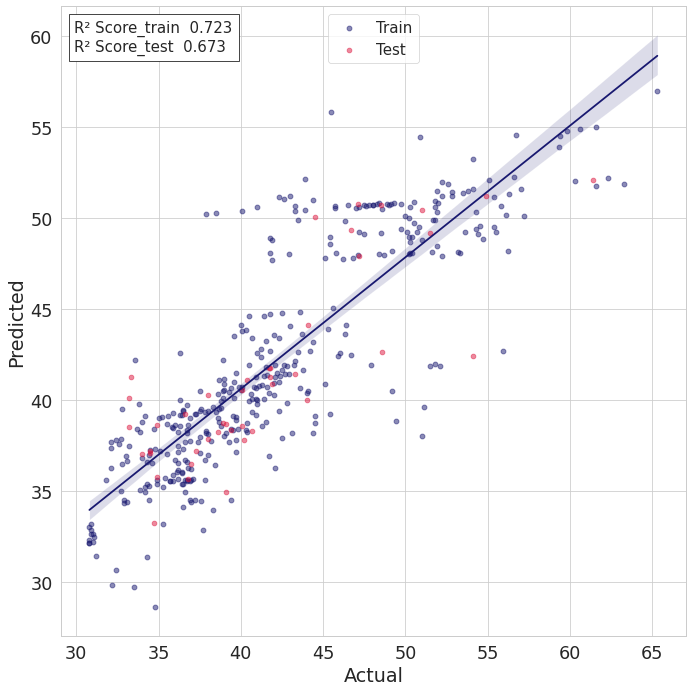

In [26]:
# Multiple Linear Regression
model = defining_model(x = 'mlr')

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'mlr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6388199185776597
Average validation rmse score after crossvalidation :  4.2783227294561135


Training Accuracy :  0.822351975117503
Mean absolute error (MAE):      2.064651
Mean squared error (MSE):       7.984195
Root mean squared error (RMSE): 2.825632
R square (R^2):                 0.807123


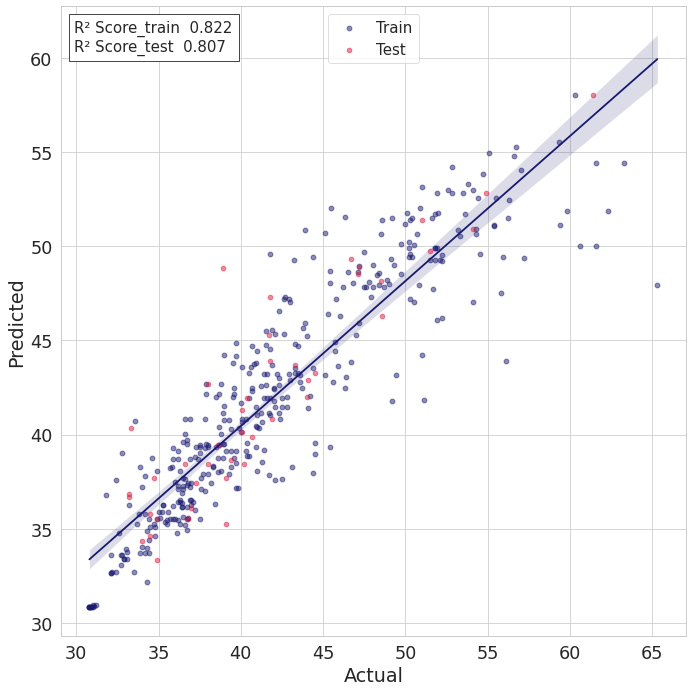

In [27]:
# KNN
model = defining_model(x = 'knn')

kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'knn')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.7004799788370509
Average validation rmse score after crossvalidation :  3.871801775221148


Training Accuracy :  0.798900285249005
Mean absolute error (MAE):      1.560837
Mean squared error (MSE):       5.857914
Root mean squared error (RMSE): 2.420313
R square (R^2):                 0.858488


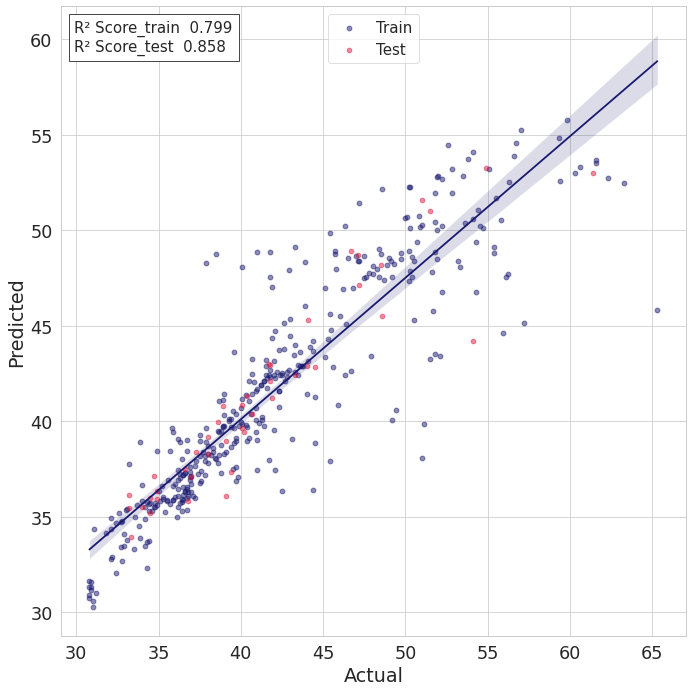

In [28]:
# Support Vector Regressor
model = defining_model(x = 'svr')

kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'svr')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.645699306182253
Average validation rmse score after crossvalidation :  4.22643890424883


Training Accuracy :  0.752691924365873
Mean absolute error (MAE):      2.811918
Mean squared error (MSE):       10.360451
Root mean squared error (RMSE): 3.218765
R square (R^2):                 0.749719


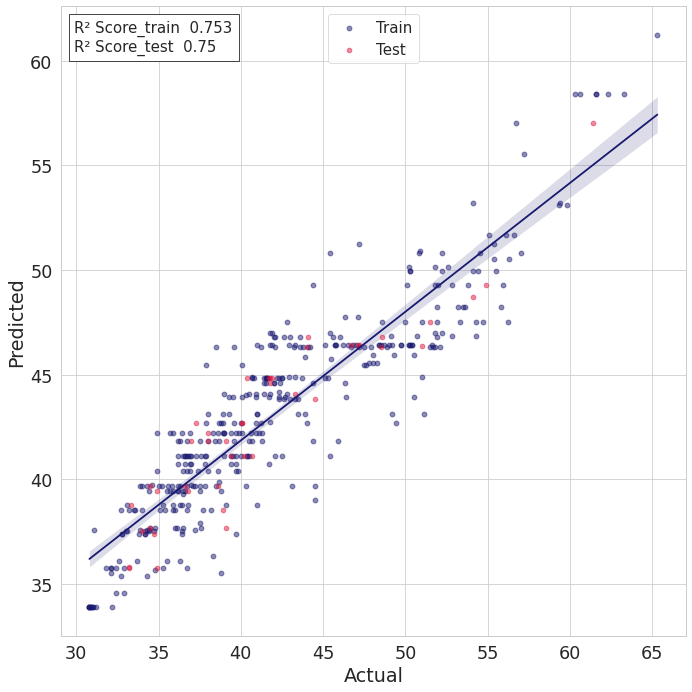

In [29]:
#Adaboost
model = defining_model(x = 'adboost')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'adboost')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.8574464736702095
Average validation rmse score after crossvalidation :  2.7218373701322953


Training Accuracy :  1.0
Mean absolute error (MAE):      1.141767
Mean squared error (MSE):       1.968634
Root mean squared error (RMSE): 1.403080
R square (R^2):                 0.952443


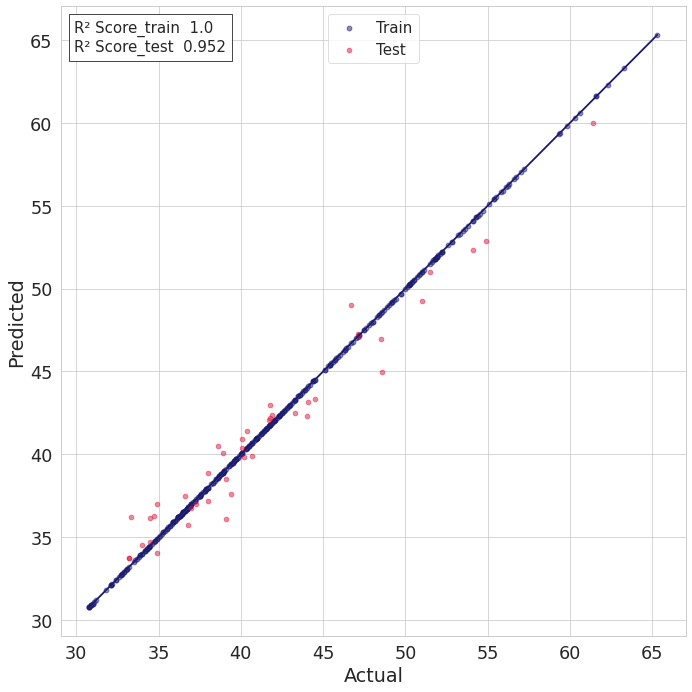

In [30]:
# Extra Tree Regressor
model = defining_model(x = 'xtratree')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'xtratree')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.792441040292146
Average validation rmse score after crossvalidation :  3.2166069674013267


Training Accuracy :  0.9650330830945603
Mean absolute error (MAE):      1.501163
Mean squared error (MSE):       4.269198
Root mean squared error (RMSE): 2.066204
R square (R^2):                 0.896867


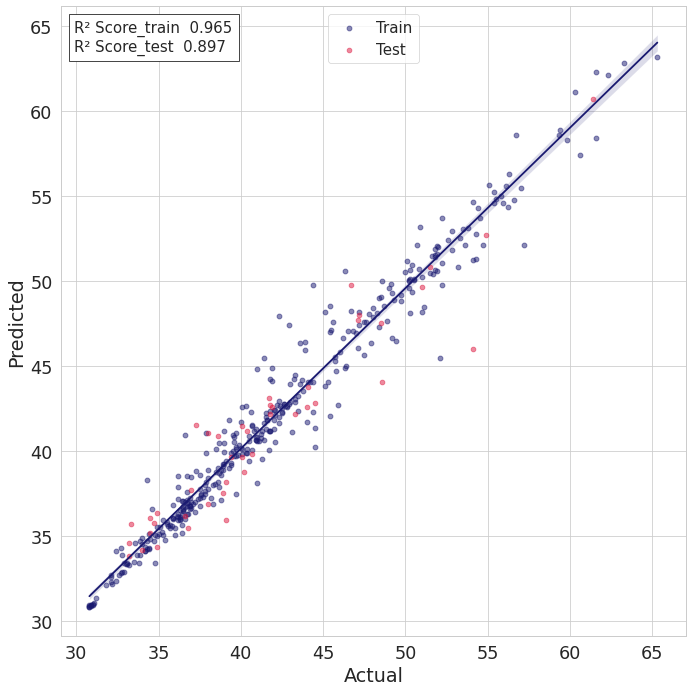

In [31]:
# Bagging Regressor
model = defining_model(x = 'bagging')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'bagging')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.8106689829048929
Average validation rmse score after crossvalidation :  3.0695791253401286


Training Accuracy :  0.974914027957309
Mean absolute error (MAE):      1.331279
Mean squared error (MSE):       3.038433
Root mean squared error (RMSE): 1.743110
R square (R^2):                 0.926599


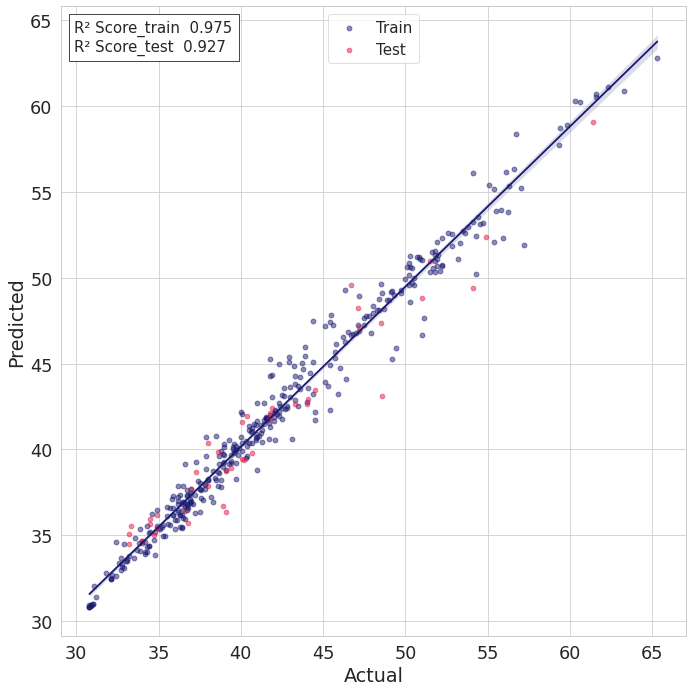

In [32]:
# Random Forest
model = defining_model(x = 'rndmfrst')
kfold = KFold(n_splits=5, shuffle=False)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'rndmfrst')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.6866063435492491
Average validation rmse score after crossvalidation :  4.00537741968603


Training Accuracy :  0.7089526474731949
Mean absolute error (MAE):      2.628425
Mean squared error (MSE):       14.244517
Root mean squared error (RMSE): 3.774191
R square (R^2):                 0.655890


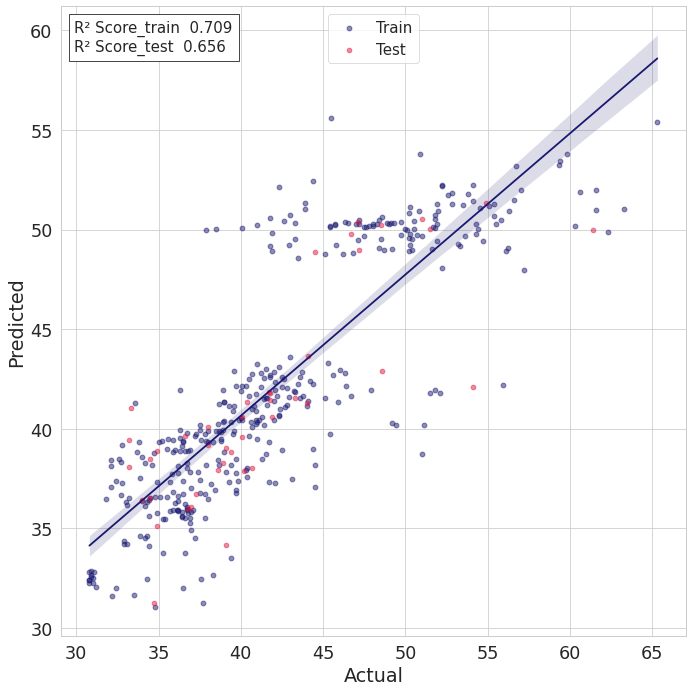

In [33]:
# Partial Least Square
model = defining_model(x = 'pls')

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
# Unscaled

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data
model = defining_model(x = 'pls')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

2022-05-18 15:03:22.238152: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-18 15:03:22.238352: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-18 15:03:22.238867: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-05-18 15:03:22.314403: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-05-18 15:03:22.314722: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Average validation R2 score after crossvalidation :  0.9293037295061477
Average validation rmse score after crossvalidation :  1.791006026623006


Training Accuracy :  0.9593942200219897
Mean absolute error (MAE):      1.040750
Mean squared error (MSE):       1.676049
Root mean squared error (RMSE): 1.294623
R square (R^2):                 0.959511


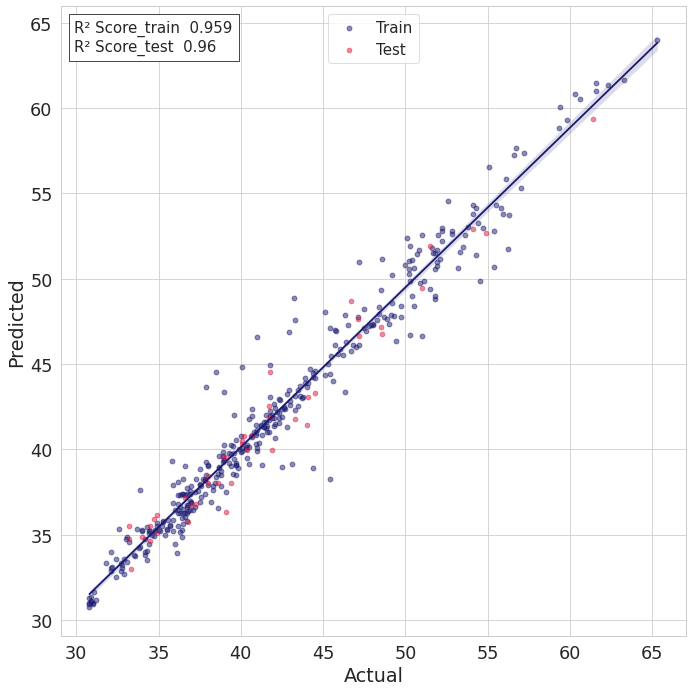

In [34]:
model = Neural_network()

kfold = KFold(n_splits=5, shuffle=True, random_state=1500)

best_score = 0.1

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  training_model(trainX.iloc[train],trainY.iloc[train],model)
  scores.append(r2_score(trainY.iloc[valid],model.predict(trainX.iloc[valid])))
  
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
    
print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data

model = Neural_network()
training_model(trainX,trainY,model)
#actual = trainY
#predicted = model.predict(trainX)

actual=np.array(scaler.inverse_transform(np.array(trainY)))
predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))
model.save("nn.h5")
score = r2_score(actual,predicted)
print("\n\nTraining Accuracy : ",score) # Training Accuracy
plots()

In [35]:
actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

In [36]:
predictions_DF = Test[['Name of the Molecule','Solvent type']]
predictions_DF['Actual'] = np.squeeze(actual_test)
predictions_DF['Predicted'] = np.squeeze(predicted_test)

In [37]:
predictions_DF.to_excel('predictions.xlsx',index = False)

In [38]:
predictions_DF = Train[['Name of the Molecule','Solvent type']]
predictions_DF['Actual'] = np.squeeze(actual)
predictions_DF['Predicted'] = np.squeeze(predicted)

In [39]:
predictions_DF.to_excel('predictions_train.xlsx',index = False)